# WeatherPy

Analysis
* Observation Trend 1: The cities with the hightest temperatures are between the latitude values of -20 and 20.
    
* Observation Trend 2: Due to land mass (and more cities) north of longitude 40, more colder temperatures are recorded in the northern hemisphere compared the southern hemisphere south of longitude -40.

* Slight coorelation between humidity and temperature relative to longitude.

In [330]:
# Import dependencies
import requests
import json
import random
from config import api_key
import numpy as np
import pandas as pd
from citipy import citipy

In [331]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

In [332]:
#Generate random lat and lon coordinates
lats = np.random.uniform(low=-90.000, high=90.000, size=1400)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1400)
coord = (list(map(list, zip(lats, lngs))))

In [333]:
# Build query URL
cities = []

for coordinate_pair in coord:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

In [334]:
api_request_city_countryu = []

for city in cities:
    country_code = city.country_code
    name = city.city_name
    name_country = name + "," + country_code
    api_request_city_country.append(name_country)


In [335]:
dfu = {"col":api_request_city_country}
dfu = pd.DataFrame(dfu)
dfu["Count"] = 1
dfu_grouped = dfu.groupby(["col"], as_index='False')
dfu_grouped_summary = dfu_grouped["Count"].sum().reset_index('col')
dfu_grouped_summary["Count2"] = 1
number_of_api_calls = dfu_grouped_summary["Count2"].sum()
print("Number of API Calls = " + str(number_of_api_calls))

Number of API Calls = 620


In [336]:
for index, row in dfu_grouped_summary.iterrows():
    query_url = url + "appid=" + api_key + "&units=metric" + "&q=" + (row["col"])

In [337]:
api_request_city = []
api_request_country = []
api_request_city_country = []
weather_data = []
humidity = []
temperature = []
wind_speed = []
cloudiness = []
latitude = []
longitude = []
city_unique_count = []

for index, row in dfu_grouped_summary.iterrows():
    query_url = url + "appid=" + api_key + "&units=metric" + "&q=" + (row["col"])

    weather_response2 = requests.get(query_url)
    weather_json2 = weather_response2.json()

    try:
        wind_speed.append(weather_json2["wind"]["speed"])
        temperature.append(weather_json2["main"]["temp_max"])
        humidity.append(weather_json2["main"]["humidity"])
        cloudiness.append(weather_json2["clouds"]["all"])
        latitude.append(weather_json2["coord"]["lat"])
        longitude.append(weather_json2["coord"]["lon"])
        city_unique_count.append(name_country)
        print(query_url)
        
    except KeyError:
        
        print("Key Error City Not Used")

http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=aasiaat,gl
Key Error City Not Used
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=acajutla,sv
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=adrar,dz
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=ahipara,nz
Key Error City Not Used
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=akdepe,tm
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=aklavik,ca
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=akropong,gh
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=albany,au
Key Error City Not Used
http://api.openweathermap.org/data

http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=cabra,ph
Key Error City Not Used
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=calatayud,es
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=camacupa,ao
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=camana,pe
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=cape town,za
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=caravelas,br
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=carnarvon,au
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=cascas,pe
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27ef

http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=funadhoo,mv
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=galle,lk
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=gamba,ga
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=gambela,et
Key Error City Not Used
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=gbadolite,cd
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=georgetown,sh
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=geraldton,au
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=ginir,et
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbee

http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=karpogory,ru
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=kastornoye,ru
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=katherine,au
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=katsuura,jp
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=kattivakkam,in
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=kavieng,pg
Key Error City Not Used
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=keetmanshoop,na
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=ketchikan,us
http://api.openweathermap.org/data/2.5/weather?appid=63090c51

http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=maubeuge,fr
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=mayo,ca
Key Error City Not Used
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=menongue,ao
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=meulaboh,id
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=micheweni,tz
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=miraflores,co
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=miranda,br
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=mitu,co
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbee

http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=ponta do sol,pt
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=port alfred,za
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=port arthur,us
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=port blair,in
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=port elizabeth,za
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=port hardy,ca
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=port hawkesbury,ca
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=port lincoln,au
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d

http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=seoul,kr
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=severo-kurilsk,ru
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=shache,cn
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=shahpur,in
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=sharjah,ae
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=shibetsu,jp
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=shirokiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=shubarkuduk,kz
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=me

http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=usinsk,ru
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=ust-kuyga,ru
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=ust-maya,ru
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=uusikaupunki,fi
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=vaini,to
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=vaitape,pf
Key Error City Not Used
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=vallenar,cl
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f27efbeeed9ed99&units=metric&q=valparaiso,cl
http://api.openweathermap.org/data/2.5/weather?appid=63090c51683d92af2f

In [338]:
#Count the number cities plotted
number_of_plots = len(city_unique_count)
print ("Number of plots = " + str(number_of_plots))

Number of plots = 535


# Latitude vs Temperature Plot

In [339]:
# Build a scatter plot for each data type
import matplotlib.pyplot as plt
plt.scatter(temperature, latitude, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Maximum Temperature")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Latitude")
plt.grid(True)

In [340]:
# Save the figure
plt.savefig("City_Latitude_vs_Temperature.png")

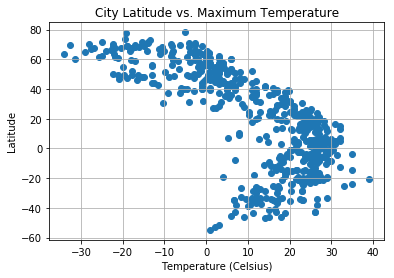

In [341]:
# Show plot
plt.show()

# Latitude vs Humidity Plot

In [342]:
# Build a scatter plot for each data type
plt.scatter(humidity, latitude, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Humidity %")
plt.ylabel("Latitude")
plt.grid(True)

In [343]:
# Save the figure
plt.savefig("City_Latitude_vs_Humidity.png")

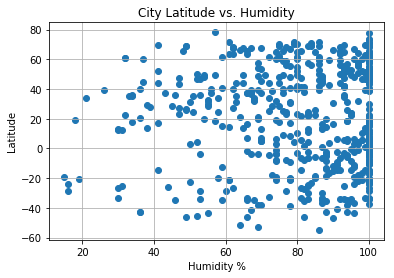

In [344]:
plt.show()

# Latitude vs Cloudiness Plot

In [345]:
# Build a scatter plot for each data type
plt.scatter(cloudiness, latitude, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.grid(True)

In [346]:
# Save the figure
plt.savefig("City_Latitude_vs_Cloudiness.png")

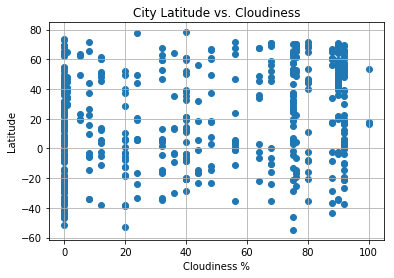

In [347]:
plt.show()

In [348]:
#Latitude vs Wind Speed

In [349]:
# Build a scatter plot for each data type
plt.scatter(wind_speed, latitude, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Wind Speed Meter/Second")
plt.ylabel("Latitude")
plt.grid(True)

In [350]:
# Save the figure
plt.savefig("City_Latitude_vs_Wind_Speed.png")

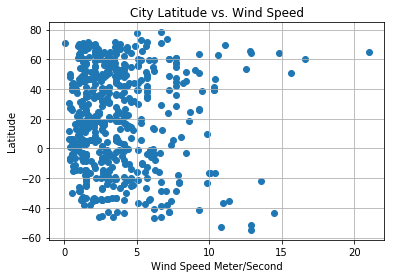

In [351]:
plt.show()